<a href="https://colab.research.google.com/github/yasminhanunk/Final-Project-The-Champions-Group/blob/main/Explore_Final_Dataset_Azizah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. ProductID : Nomor seri khusus alat atau mesin
2. Type : tipe mesin. Terdiri dari huruf L, M, atau H untuk rendah (50% dari semua produk), sedang (30%), dan tinggi (20%) sebagai varian kualitas produk dan nomor seri khusus varian.
3. air temperature [K] : Suhu udara 
4. process temperature [K] : Suhu proses
5. rotational speed [rpm] : Kecepatan rotasi
6. torque [Nm] : Nilai torsi
7. tool wear [min] : Keausan pahat (perubahan bentuk pahat dari bentuk aslinya selama operasi pemotongan, sebagai akibat dari hilangnya material pahat secara bertahap). Varian kualitas H/M/L menambahkan 5/3/2 menit keausan pahat ke pahat bekas dalam prosesnya.

8. Machine failure : [0] -> no , [1] -> yes
9. TWF : Tool Wear Failure
10. HDF : Heat Dissipation Failure
11. PWF : Power Failure
12. OSF : Overstrain Failure
13. RNF : Random Failures

# Data Preparation

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df=pd.read_csv('/content/drive/MyDrive/StartupCampus/ai4i2020.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

cek missing value

In [23]:
pd.isnull(df).sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

cek data duplikat

In [24]:
df[df.duplicated(keep=False)]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF


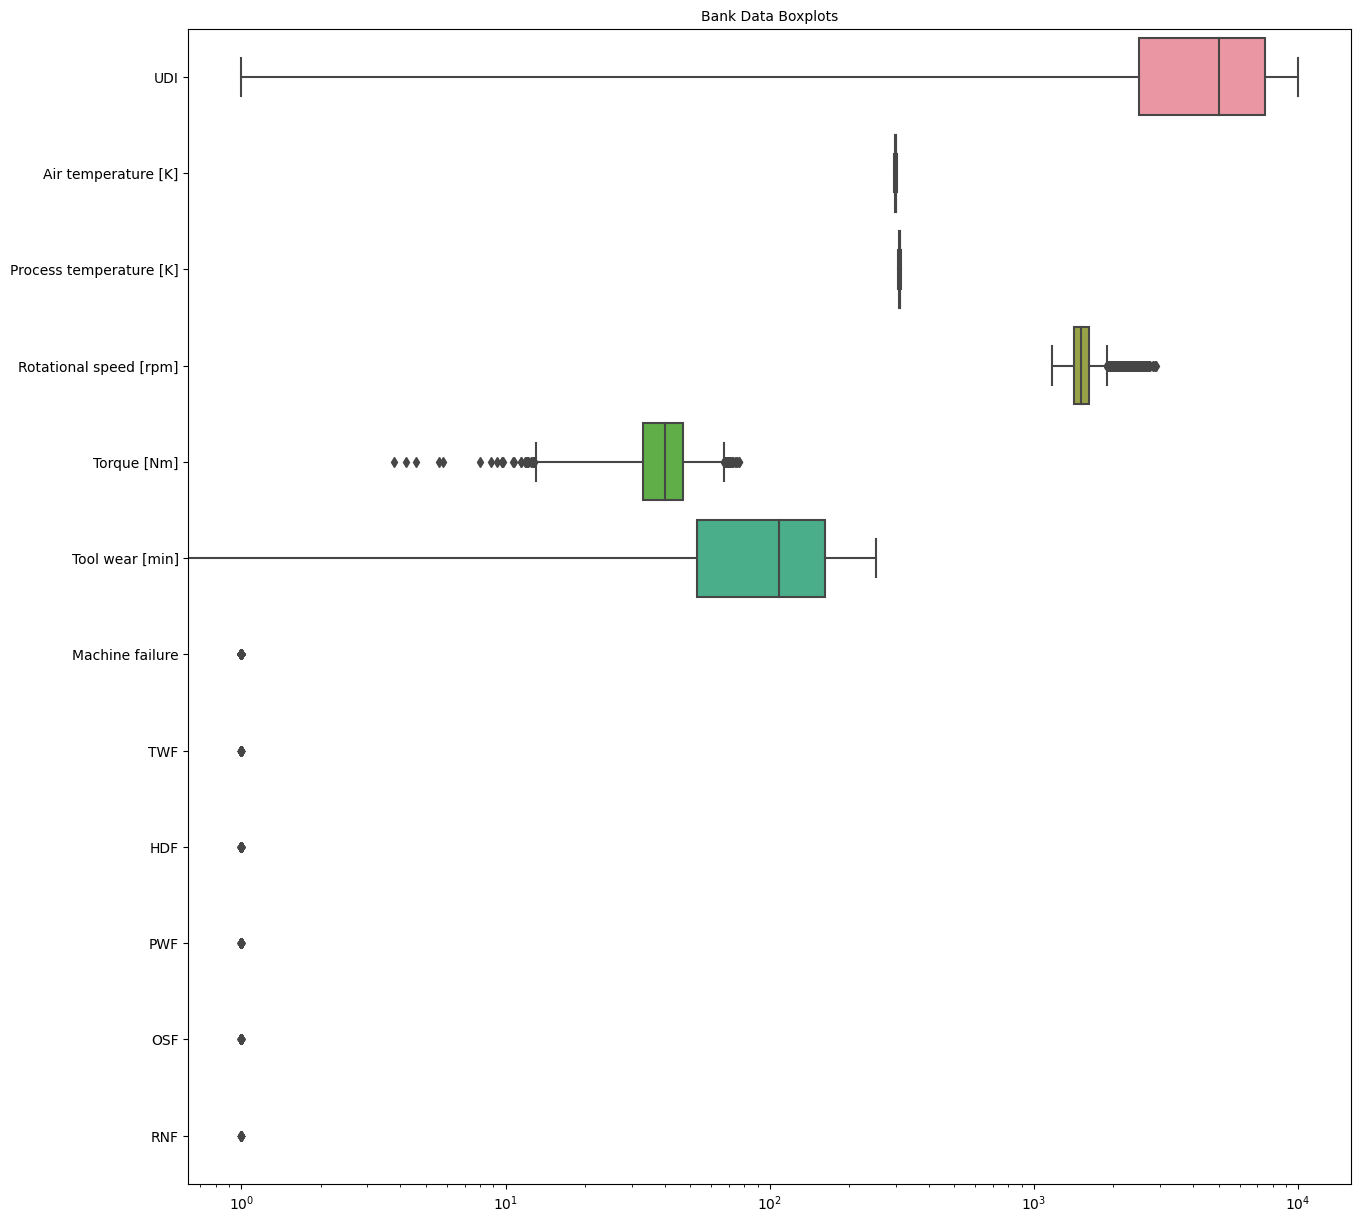

In [25]:
plt.figure(figsize = (15,15))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 10)
ax.set(xscale="log")
plt.show()

In [26]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [27]:
lowerbound,upperbound = outlier_treatment(df['Rotational speed [rpm]'])
df[(df['Rotational speed [rpm]'] < lowerbound) | (df['Rotational speed [rpm]'] > upperbound)]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
14,15,L47194,L,298.6,309.2,2035,19.6,40,0,0,0,0,0,0
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
70,71,M14930,M,298.9,309.0,1924,22.6,193,0,0,0,0,0,0
101,102,L47281,L,298.8,308.8,1991,20.7,59,0,0,0,0,0,0
155,156,H29569,H,298.4,308.2,1987,19.8,198,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9865,9866,M24725,M,298.9,309.8,2450,13.9,89,0,0,0,0,0,0
9871,9872,M24731,M,298.9,309.8,1947,21.7,105,0,0,0,0,0,0
9886,9887,L57066,L,298.8,309.6,1903,22.3,145,0,0,0,0,0,0
9926,9927,M24786,M,298.5,308.6,1897,20.2,50,0,0,0,0,0,0


In [28]:
df.drop(df[(df['Rotational speed [rpm]'] > upperbound) | (df['Rotational speed [rpm]'] < lowerbound) ].index , inplace=True)

In [35]:
lowerbound,upperbound = outlier_treatment(df['Torque [Nm]'])
df[(df['Torque [Nm]'] < lowerbound) | (df['Torque [Nm]'] > upperbound)].shape[0]

47

In [36]:
df.drop(df[(df['Torque [Nm]'] > upperbound) | (df['Torque [Nm]'] < lowerbound) ].index , inplace=True)

Transformasi data (Label One-Hot Encoding)

In [37]:
df = pd.get_dummies(df, columns = ['Type'])

In [38]:
df.head()

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,1,M14860,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,0,1
1,2,L47181,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,1,0
2,3,L47182,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,1,0
3,4,L47183,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,1,0
4,5,L47184,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,1,0


cek imbalance data

In [39]:
df['Machine failure'].value_counts()

0    9272
1     263
Name: Machine failure, dtype: int64

In [40]:
X = df.drop(columns=['Product ID','Machine failure'])
y = df['Machine failure']

x_train,x_test,y_train,y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [42]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(sampling_strategy=0.5,k_neighbors=5,random_state = 0) 
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel()) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (11161, 14)
After OverSampling, the shape of train_y: (11161,) 

After OverSampling, counts of label '1': 3720
After OverSampling, counts of label '0': 7441
